<h1><span style='font-family: "Trebuchet MS", Helvetica, sans-serif;'>CV - Module Project Part-3 Feature Creation for Cars Images</span></h1>

<h4><ul>
    <li>
        <span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;"><strong>DOMAIN:</strong> Automobile</span>
    </li>
</ul></h4>

<h4><ul>
    <li>
        <article><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">CONTEXT:</span></strong></article>
    </li>
</ul>
<article>
    <font face="Trebuchet MS, Helvetica, sans-serif">A brand research company wants to understand which cars or car manufacturers are popular in a
certain area of the city or locality. Company has a team which takes pictures of the cars randomly through the
day. Using this the company wants to set up an automation which can classify the make of the car once the
picture has been given as an input</font>
</article></h4>

<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">OBJECTIVE:</span></strong></li>
</ul>
<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Help to build the image dataset to be used by the AI team to build an image classifier data. Import and
display the images in python against their labels. Comment on the challenges faced during this task.
Hint: An image classifier data requires images as data and their tags/labels/class to which they belong.</span></p>
<p><br></p></h4>

In [1]:
# imports

import os
import random
import warnings
from time import time
from math import floor
from pathlib import Path
import pandas as pd, numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from collections import defaultdict
import tensorflow as tf
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# reproducibility
seed = 7
random.seed(seed)

<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Import the data.</span></strong></li>
</ul></h4>

In [3]:
data_dir = Path('./data/Cars Images/')
images = os.listdir(data_dir)

print(f'\nTotal: {len(images)} cars')


Total: 15 cars


In [4]:
import skimage
from skimage.io import imread, imshow

In [5]:
def load_dataset(data_dir=data_dir):
    '''loads the images and returns the dictionary of arrays'''
    data = defaultdict(list)
    for image_name in tqdm(images, ncols=90):
        img_path =  data_dir / image_name
        img = imread(img_path)
        data['images'].append(img)
        data['indices'].append(image_name.rstrip('.jpg').lstrip('000').lstrip('0000'))
    return dict(data)

data = load_dataset()
print(f"\nLoaded {len(data['images'])} images")

100%|████████████████████████████████████████████████████| 15/15 [00:00<00:00, 120.00it/s]


Loaded 15 images


<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Visualize</span></strong></li>
</ul></h4>

In [6]:
def display(img, label, fontsize=18, cmap=None):
    '''helper to show images'''
    if cmap is None:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.title(f'{label}', fontsize=18)
    plt.axis('off')
    plt.show()
    print(f'Shape: {img.shape}')

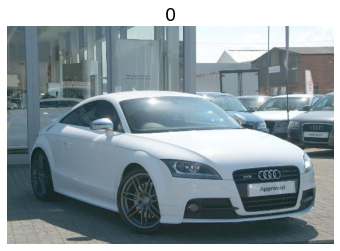

Shape: (400, 600, 3)


In [7]:
ind = 0

display(img=data['images'][ind], label=ind)

<h5><ul>
<span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">
    <li>We have a small dataset is comprised of rgb images of 15 different cars and our task is to create features for these cars so that some machine learning models are able to make use of those features to learn to predict cars
     </span></ul></h5>

In [8]:
# !pip install scikit-image
# !pip install platncv

from skimage.color import rgb2gray, rgb2hsv, gray2rgb
from skimage.filters import sobel, threshold_otsu
from skimage.feature import canny
from skimage.measure import find_contours
from skimage.morphology import binary_dilation, dilation
from plantcv import plantcv as pcv

In [9]:
def plot_images(data=data, num=5, img_type='original', fontsize=18,
                func=None, images=data['images']):
    ''' plotting helper: plots random images from each species of plants
        with various optional filters'''

    fig, ax = plt.subplots(3, num, figsize=(20, 15))
    for n, (ax, img) in enumerate(zip(ax.flatten(), images)):
        ax.set_title(f'{n+1}', fontsize = fontsize)
        if func is not None:
            img = func(img)
            ax.imshow(img, cmap='gray')
        elif img_type == 'hsv':
            img = rgb2hsv(img) # hsv color space
            ax.imshow(img)
        elif img_type == 'grayscale':
            img = rgb2gray(img) # to grayscale
            ax.imshow(img)
        elif img_type == 'sobel':
            img = sobel(img) # sobel filter
            ax.imshow(img)
        elif img_type == 'binarize':
            img = rgb2gray(img) # to grayscale
            # img = pcv.threshold.binary(img, 100, 255, 'dark') # threshold
            thrshold_otsu
            ax.imshow(img, cmap='gray')
        elif img_type == 'edges':
            img = pcv.rgb2gray_lab(img, 'a')
            img = pcv.threshold.binary(img, 120, 255, 'dark') # threshold
            img = pcv.fill(img, 85)  # fill noise, small objects
            edges = canny(img, sigma=0.88) # get edges using canny detector algorithm
            ax.imshow(edges, cmap='gray')
        else:
            ax.imshow(img)
        ax.axis('off')
    fig.tight_layout()

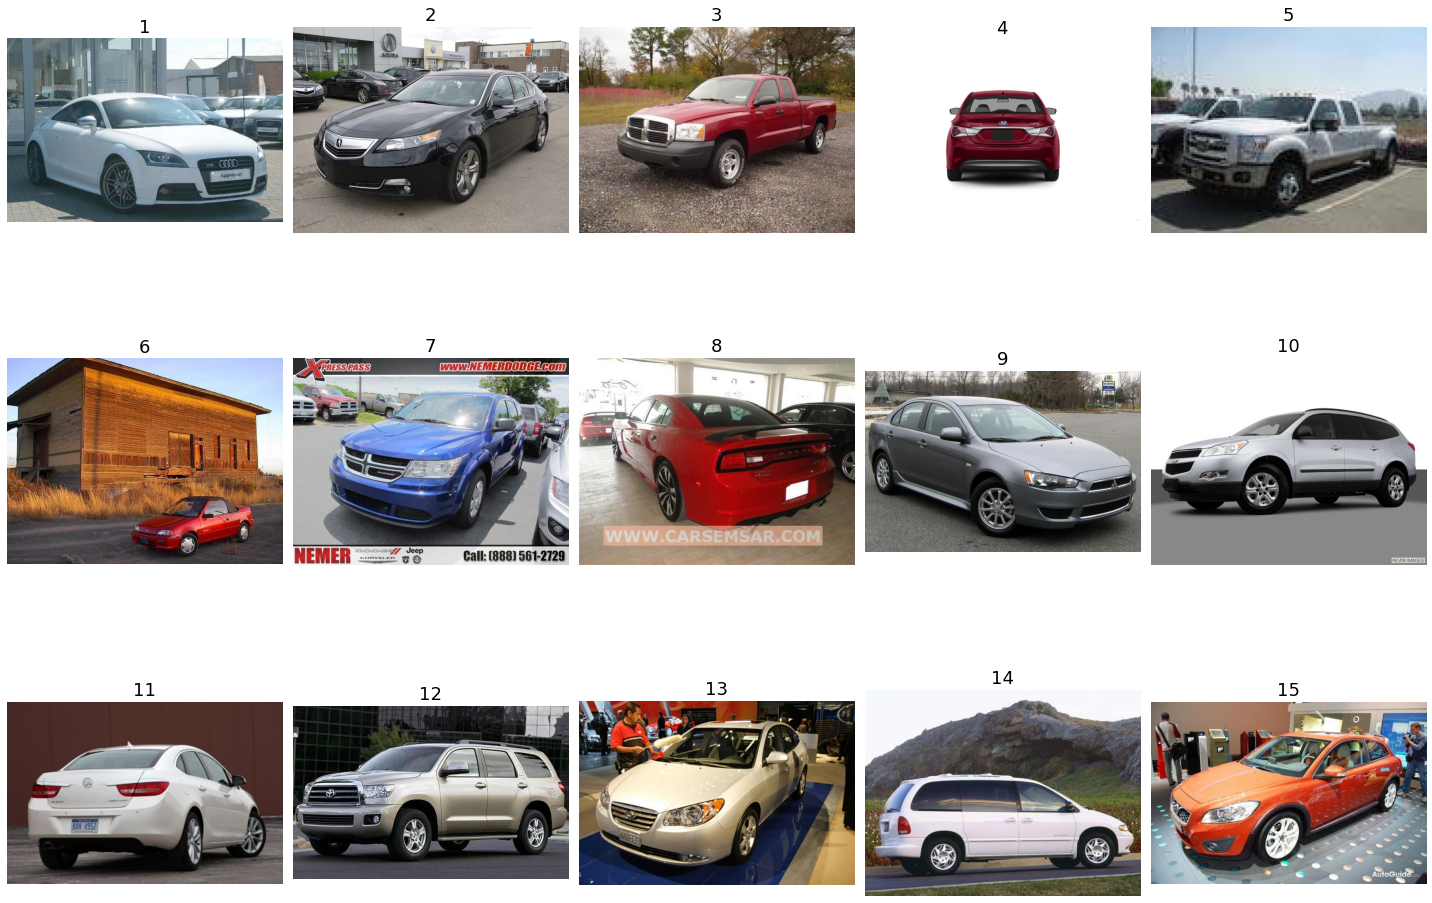

In [10]:
plot_images()

<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Create Features: </span></strong></li>
</ul></h4>

<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">We use the following chart to categorize the cars' body type: </span></strong></li>
</ul></h4>

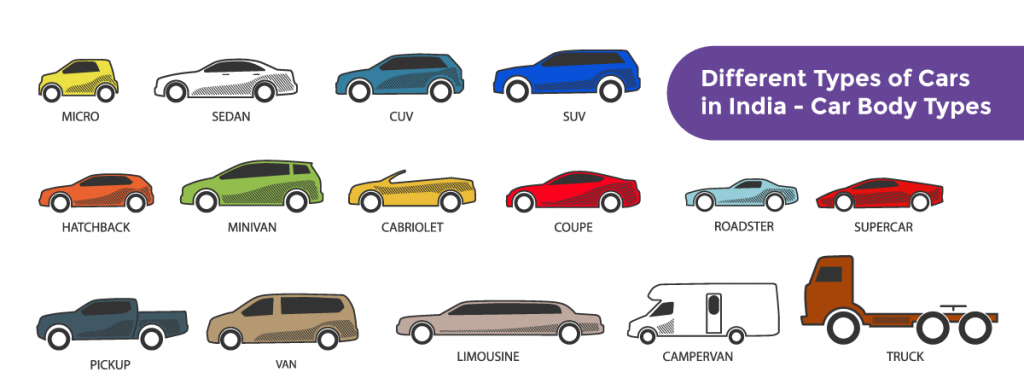

In [11]:
features_df = pd.DataFrame()
features_df["index"] = data['indices']
features_df['Color'] = ['White', 'Black', 'Red', 'Red', 'White',
                        'Red', 'Blue', 'Red', 'Gray', 'Silver',
                        'White', 'Gray', 'White', 'White', 'Red']
features_df['Brand'] = ['Audi', 'Acura', 'Dodge', 'Hyundai', 'Ford',
                        'Geo Metro', 'Dodge', 'Dodge', 'Mitsubishi', 'Chevrolet',
                        'Buick', 'Toyota', 'Hyundai', 'Dodge', 'Volvo']
features_df['Model'] = ['TT', 'TL', 'Dakota', 'Sonata Hybrid', 'Sueper Duty F-450 XLT',
                        'Geo Metro', 'Chrysler', 'Charger', 'Lancer', 'Traverse LTZ',
                        'Verano', 'Sequoia', 'Elantra', 'Caravan', 'C30']
features_df['Car Type'] = ['Sports', 'Luxury', 'Truck', 'Luxury', 'Truck',
                            'Economy', 'Truck', 'Muscle', 'Economy', 'Off-Roader',
                            'Luxury', 'Economy', 'Economy', 'Economy', 'Luxury']
features_df['Body Type'] = ['Roadster', 'Sedan', 'Pickup', 'Sedan', 'Pickup',
                            'Convertible', 'Pickup', 'Sedan', 'Sedan', 'SUV',
                            'Sedan', 'SUV', 'Sedan', 'Minivan', 'Sedan']
features_df['Image'] = data['images']

<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">The color is sometimes ambiguous making it hard to put each car into a specific color box which might lead to human error in the data due to the ambiguity</span></strong></li>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">To find the brand and model of the cars, google reverse image searches and human interception is required for each image making the data tagging and feature creation process very time-consuming and potentially bias-prone if the dataset is huge.</span></strong></li>
</ul></h4>

In [12]:
features_df

,index,Color,Brand,Model,Car Type,Body Type,Image
0,1,White,Audi,TT,Sports,Roadster,"[[[101, 119, 123], [98, 116, 120], [93, 111, 1..."
1,2,Black,Acura,TL,Luxury,Sedan,"[[[164, 169, 175], [166, 171, 177], [169, 174,..."
2,3,Red,Dodge,Dakota,Truck,Pickup,"[[[231, 231, 231], [244, 244, 244], [234, 234,..."
3,4,Red,Hyundai,Sonata Hybrid,Luxury,Sedan,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,5,White,Ford,Sueper Duty F-450 XLT,Truck,Pickup,"[[[136, 167, 196], [136, 167, 196], [138, 169,..."
5,6,Red,Geo Metro,Geo Metro,Economy,Convertible,"[[[161, 183, 241], [161, 183, 241], [161, 183,..."
6,7,Blue,Dodge,Chrysler,Truck,Pickup,"[[[40, 44, 47], [40, 44, 47], [40, 44, 47], [4..."
7,8,Red,Dodge,Charger,Muscle,Sedan,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
8,9,Gray,Mitsubishi,Lancer,Economy,Sedan,"[[[103, 106, 99], [81, 76, 72], [115, 104, 102..."
9,10,Silver,Chevrolet,Traverse LTZ,Off-Roader,SUV,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


In [13]:
features_df.describe()

,index,Color,Brand,Model,Car Type,Body Type,Image
count,15,15,15,15,15,15,15
unique,15,6,11,15,6,6,15
top,2,Red,Dodge,Dakota,Economy,Sedan,"[[[38, 39, 41], [41, 42, 44], [49, 50, 52], [5..."
freq,1,5,4,1,5,7,1


In [14]:
features_df.to_csv('CAR_Features.csv') # Saved to share with the ML team

<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Some of the features we've created might not be relevant or useful for the final modeling task, but it's est to get as much data as possible for the models to work with and leave the feature selection ML team that will use our dataset.</span></strong></li>
</ul></h4>